In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Seaborn is a library for making statistical graphics in Python. 
#It builds on top of matplotlib and integrates closely with pandas data structures.
#Seaborn integrates well with Pandas data frames, allowing users to easily pass data frame columns as plot parameters, 
#simplifying the process of referencing specific variables in data sets.

In [8]:
df = pd.read_csv('diabetes.csv')

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
#input data
x = df.drop('Outcome', axis = 1)

#output data
y = df['Outcome']

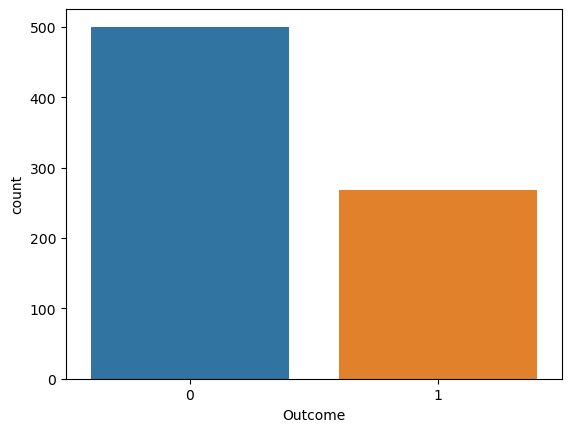

In [26]:
sns.countplot(x=y);

In [30]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [34]:
#Feature Scalong
#Feature scaling is a preprocessing technique that transforms feature values to a similar scale, 
#ensuring all features contribute equally to the model.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
#Scikit-learn or sklearn is an open-source Python library that implements a range of machine learning, 
#pre-processing, cross-validation, and visualization algorithms using a unified interface.
#MinMaxScaler is a scaler in sklearn that performs normalization by scaling features to a specified range, usually [0, 1]. 
#This scaling process adjusts the values of each feature so that they all fit within the same range, 
#which can help certain machine learning algorithms perform better and converge faster.

In [52]:
#cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [54]:
#random_state=0 sets a seed for the random number generator, ensuring that the split of data into training 
#and testing sets is reproducible each time you run the code. Without a specified random_state, the function 
#splits data randomly each time, resulting in different training and testing sets.
#Setting random_state to a fixed integer (like 0 or any other number) allows you to achieve the same results every 
#time you split the data, which is especially useful when comparing models or debugging.
#test_size=0.25 indicates that 25% of the data will be allocated to the test set, while the remaining 75% will go to the training set.

In [56]:
x.shape

(768, 8)

In [67]:
x_train.shape


(576, 8)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors = 5) #knn is object of kneighborsclassifier class

In [76]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [78]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [80]:
#A confusion matrix is a table used to evaluate the performance of a classification model by comparing 
#the actual values (true labels) with the model’s predictions. It provides a quick insight into how well 
#a model is classifying each class and where it might be making errors.

In [82]:
#Accuracy: The proportion of correct predictions.
#Precision: The proportion of positive predictions that were actually correct.
#Recall (Sensitivity): The proportion of actual positives correctly predicted.

In [84]:
y_pred = knn.predict(x_test)

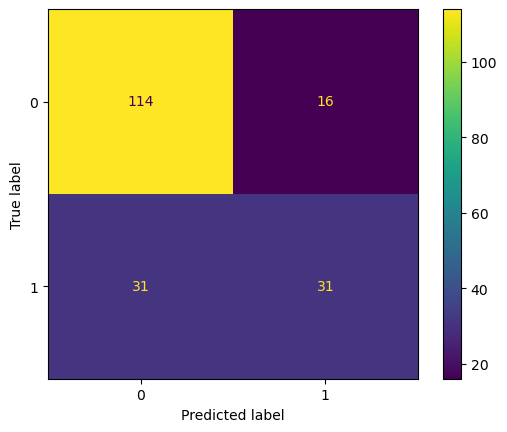

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [96]:
error =[]
for k in range(1,41):
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

In [108]:
#we will run k from 1 to 40, that means we will run 40 times knn
#and at every iteration w will take average of mismatch (mismatch between predicted and test or actual values) entries 
#and will append ot to error list
#we will do all this in order to find a more accurate value of k

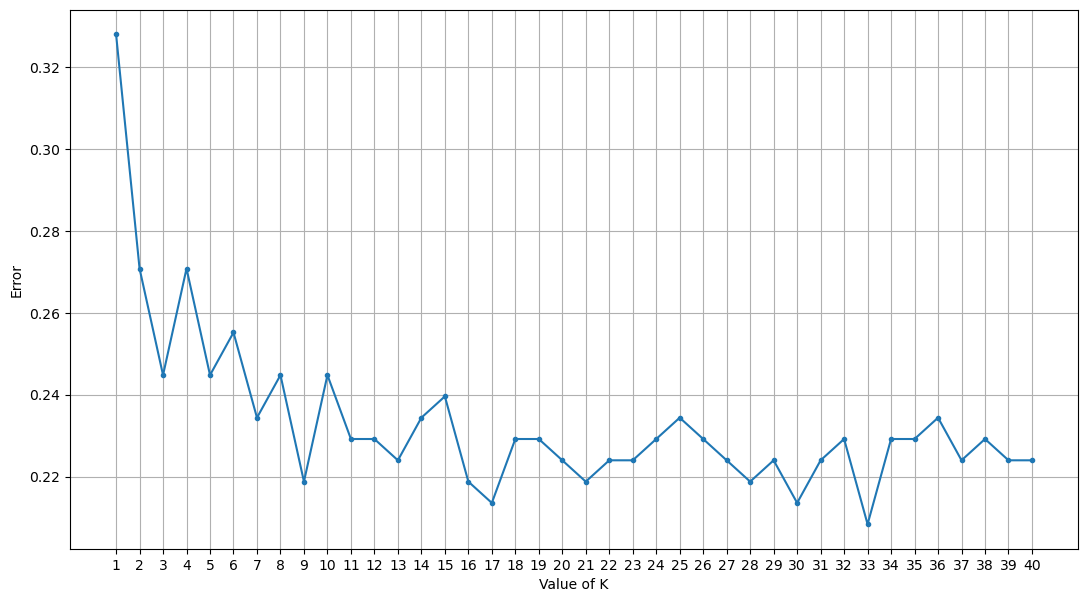

In [106]:
plt.figure(figsize=(1,7))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), error, marker='.')

In [110]:
#here we can see at k = 33 the error is minimum thus 33 is ideal value here

In [116]:
knn =  KNeighborsClassifier(n_neighbors = 33)

In [118]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [120]:
y_pred = knn.predict(x_test)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192



In [ ]:
#The K-Nearest Neighbors (KNN) algorithm is a simple yet powerful machine learning algorithm used for both classification and regression tasks. 
#It’s intuitive because it makes predictions based on the "closeness" of data points, which can be visualized as points in a space where similar 
#items are near each other.
#The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm. The value of k in the k-nearest 
#neighbors (k-NN) algorithm should be chosen based on the input data. If the input data has more outliers or noise, a higher value of k 
#would be better.
#Machine learning scaling is part of data preparation as this technique brings data points that are far from each other closer in order to increase 
#the algorithm effectiveness and speed up the Machine Learning processing.